## Agenda:

1. What is Feature Selection
2. Feature Selection vs Feature Engineering vs Dimensionality Reduction.
3. Feature Selection Methods.
4. Python implementation of these techniques

## Feature Selection

- It is a process by which we reduce the number of features that are considered in machine learning. 

#### Benefits:
1. ML model becomes more interpretable
2. Shorter training time
3. Reduce Overfitting i.e. More Generalized Model

## Feature Selection vs Feature Engineering vs Dimensionality Reduction

#### Feature Selection:
- It is a process by which we reduce the number of features that are considered in machine learning.

#### Feature Engineering:
- This is all about Data preprocessing to make the model more effective. It transforms data in such a way that model performs better.

#### Dimensionality Reduction:
- This is all about transforming the features from higher to lower dimension using techniques like PCA, LDA etc..
- In this process care is taken that most revelent information is still restored

## Feature Selection Methods:

- Filter Methods: Simple way of selecting features that you think will have impact on the target without any ML algorithm
- Wrapper Methods: It uses ML algorithms to identify the subset of features which will be better target. It is dependent upon ML Algorithms
- Embedded Methods: This methods combines the quality of both Fitler Methods and Wrapper Methods

## Feature Selection using Filter Methods

- They are used independently of ML algorithms
- Selection is done purely based on data characteristics
- These are simple and quick ways of Feature Selection

### Advantages:

- Selected Features can be used for all ML algorithms. This means that if you change the ML algorithm, there is absolutely no neeed to change the feature selected using the filter method.
- Computationally no so expensive 

### Types :
- <b> Univariate Filter Based Methods </b> : These methods treat each feature independently
- <b> Multivariate Filter Based Methods </b> : They will use relationship between feataures

## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Filter Methods
- Constant or Quasi constant Features
- Feature Selector that removes all low - variance features

In [2]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [4]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [11]:
df['A'] = oe.fit_transform(df[['A']])
df['A'] = df['A'].apply(lambda x : int(x))
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [21]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.2)

In [22]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [24]:
pd.DataFrame(vt.fit_transform(df), columns = ['A', 'B'])

,A,B
0,1,1
1,2,2
2,3,3
3,1,1
4,2,2
5,1,1
6,1,1
7,1,1


In [25]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

### Dropping duplicated columns

## Correlation Method: 

- Correlation is measured as linear relationship between two quantative columns. It tells us how one variable is dependent on the other. eg: Sales & Profit or No of hours Studied & Marks

In [27]:
data = pd.read_csv('winequality-white.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
corr['quality'].sort_values(ascending = False).head(6)

quality                1.000000
alcohol                0.435575
pH                     0.099427
sulphates              0.053678
free sulfur dioxide    0.008158
citric acid           -0.009209
Name: quality, dtype: float64

<Axes: >

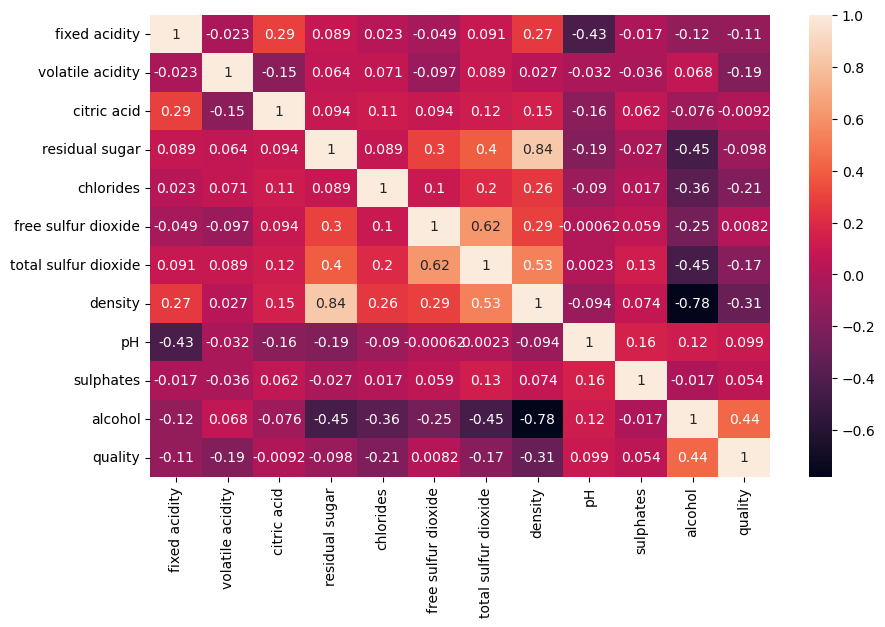

In [30]:
plt.figure(figsize = (10, 6))
corr = data.corr()
sns.heatmap(corr, annot = True)

## 3. Chi-squared Method

- Used for testing relationship between the categorical variables(binary variables/ ordinal variables)
- This methods calculates relationship between all features and the target ( features are categorical data and target is also categorical)

In [37]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']

adult = pd.read_csv('adult.csv', names = cols)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
cat_adult = adult.select_dtypes(include = ['object'])
cat_adult.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [40]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [42]:
adult_oe = oe.fit_transform(cat_adult)
adult_oe

array([[ 7.,  9.,  4., ...,  1., 39.,  0.],
       [ 6.,  9.,  2., ...,  1., 39.,  0.],
       [ 4., 11.,  0., ...,  1., 39.,  0.],
       ...,
       [ 4., 11.,  6., ...,  0., 39.,  0.],
       [ 4., 11.,  4., ...,  1., 39.,  0.],
       [ 5., 11.,  2., ...,  0., 39.,  1.]])

In [48]:
cols = cat_adult.columns.to_list()
print(cols)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'Salary']


In [54]:
df = pd.DataFrame(adult_oe, columns = cols)
df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0


In [56]:
X = df.drop('Salary', axis = 1)
y = df['Salary']

#### Selecting best categorical using the SelectKBest function

In [65]:
from sklearn.feature_selection import chi2, SelectKBest
fs = SelectKBest(k = 3, score_func = chi2)

In [66]:
fs.fit_transform(X, y)

array([[4., 1., 1.],
       [2., 4., 0.],
       [0., 6., 1.],
       ...,
       [6., 1., 4.],
       [4., 1., 3.],
       [2., 4., 5.]])

In [67]:
fs.get_feature_names_out()

array(['marital-status', 'occupation', 'relationship'], dtype=object)

In [69]:
df_fs = pd.DataFrame(fs.fit_transform(X, y), columns = fs.get_feature_names_out())
df_fs.head()

,marital-status,occupation,relationship
0,4.0,1.0,1.0
1,2.0,4.0,0.0
2,0.0,6.0,1.0
3,2.0,6.0,0.0
4,2.0,10.0,5.0


## NOTE : Correlation method of feature selection is used when we have continuous independent features and continuous target. Chi2 method is used when we have categorical independent features and categorical target

## Anova Univariate Method for Feature Selection
- Used for features which are continuous and normally distributed
- Target can discrete/categorical
- Target can also be continouous

In [70]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [74]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<Axes: xlabel='fixed acidity', ylabel='Density'>

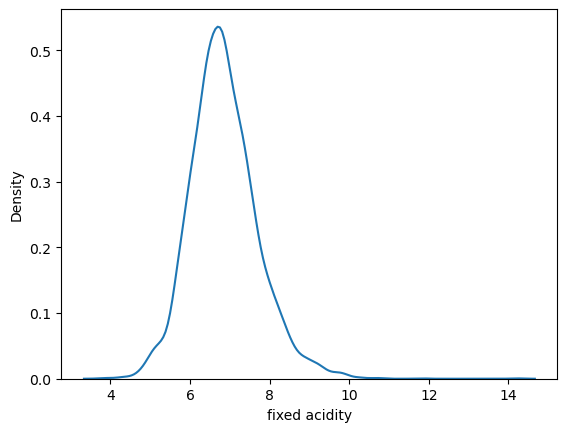

In [71]:
sns.kdeplot(x = 'fixed acidity', data = data)

## Seperate X and y

In [72]:
X = data.drop('quality',axis = 1)
y = data['quality']

## Apply the Anova method

- score_func = f_classif if the target variable is categorical
- score_func = f_regrerssion if the target variable is contiuous

In [75]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(k = 4, score_func = f_classif)

In [76]:
fs.fit_transform(X, y)

array([[  0.27   , 170.     ,   1.001  ,   8.8    ],
       [  0.3    , 132.     ,   0.994  ,   9.5    ],
       [  0.28   ,  97.     ,   0.9951 ,  10.1    ],
       ...,
       [  0.24   , 111.     ,   0.99254,   9.4    ],
       [  0.29   , 110.     ,   0.98869,  12.8    ],
       [  0.21   ,  98.     ,   0.98941,  11.8    ]])

In [77]:
fs.get_feature_names_out()

array(['volatile acidity', 'total sulfur dioxide', 'density', 'alcohol'],
      dtype=object)

In [82]:
X = pd.DataFrame(fs.fit_transform(X, y), columns = fs.get_feature_names_out())
X.head()

,volatile acidity,total sulfur dioxide,density,alcohol
0,0.27,170.0,1.0010,8.8
1,0.30,132.0,0.9940,9.5
2,0.28,97.0,0.9951,10.1
3,0.23,186.0,0.9956,9.9
4,0.23,186.0,0.9956,9.9


## Divide the data into train_test_split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Fit logistic regression on the X_train, y_train

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [86]:
lr.fit(X_train, y_train)

LogisticRegression()

## Perform predictions

In [87]:
lr.predict(X_test)

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [88]:
lr.score(X_test, y_test)

0.47006802721088436

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [90]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [91]:
dtc.score(X_test, y_test)

0.573469387755102